<a href="https://colab.research.google.com/github/adityapanwar94/Data-Analysis-and-Process-Automation-DaPrA-/blob/drishti/Dataset_preprocessing%2C_analysis%2C_correlation_matrix(User_data_only%2C_no_computer_specs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Dataset**

In [258]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [260]:
!unzip -q /content/drive/MyDrive/eYSIP_Data/Dataset26-06.zip

## **Importing Libraries**

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [262]:
Grouped_data = pd.read_csv(r'/content/Dataset (26-06-22)/Dataset_grouped(25-06-22).csv')
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 160 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(156)
memory usage: 1.6 MB


In [263]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
count,1293.000000,1286.000000,1292.000000,1292.000000,1184.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.494606,2.898671,1.962461,63.363176,3.768755,0.008507,0.07966,0.096674,0.015468,...,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831,0.047177
std,560.509233,0.812837,3.185943,2.462263,55.176500,0.827104,0.133152,0.42811,0.593382,0.218514,...,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279,0.369212
min,1001.000000,2.870000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.117812,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.589417,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.011875,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [264]:
Grouped_data.isnull().sum()

team_id                      0
cgpa                         7
onlineCourse                 1
completeCourse               1
internetspeed<             109
                          ... 
Department_category_0.0      0
Department_category_1.0      0
Department_category_2.0      0
Department_category_3.0      0
Department_category_4.0      0
Length: 160, dtype: int64

In [356]:
def unique_chart(Dataset):
  uni_dict = {}
  uni_value ={}
  keys = Dataset.columns
  for i in keys:
    uni_dict[i] = Dataset[i].nunique()
    if Dataset[i].nunique() <= 10:
      uni_value[i] = Dataset[i].unique()
    else:
      uni_value[i] = None
  Unique = pd.DataFrame([uni_dict, uni_value]) 
  return (Unique)

In [360]:
Unique1 = unique_chart(Grouped_data)
print(Unique1.to_markdown())

|    |   team_id |   cgpa |   onlineCourse |   completeCourse | internetspeed<                       | Year_1.0    | Year_2.0    | Year_3.0    | Year_4.0    | Gender_0.0   | Gender_1.0   | Gender_3.0   | elsiLab_0.0   | elsiLab_1.0   | elsiLab_2.0   | ssc_board_0.0   | ssc_board_1.0   | ssc_board_2.0   | ssc_board_3.0   | ssc_board_4.0   | hsc_board_0.0   | hsc_board_1.0   | hsc_board_2.0   | hsc_board_3.0   | hsc_board_4.0   | workstation_1.0   | workstation_2.0   | sub_ros_0.0   | sub_ros_1.0   | sub_ros_2.0   | sub_ros_3.0   | sub_ros_4.0   | sub_ip_0.0   | sub_ip_1.0   | sub_ip_2.0   | sub_ip_3.0   | sub_ip_4.0   | sub_emb_c_0.0   | sub_emb_c_1.0   | sub_emb_c_2.0   | sub_emb_c_3.0   | sub_emb_c_4.0   | sub_ml_0.0   | sub_ml_1.0   | sub_ml_2.0   | sub_ml_3.0   | sub_ml_4.0   | sub_ap_0.0   | sub_ap_1.0   | sub_ap_2.0   | sub_ap_3.0   | sub_ap_4.0   | sub_cs_0.0   | sub_cs_1.0   | sub_cs_2.0   | sub_cs_3.0   | sub_cs_4.0   | sub_mss_0.0   | sub_mss_1.0   | sub_mss_2.0   | sub_mss_3.

In [267]:
columns = ['internetspeed<', 'cgpa', 'onlineCourse', 'completeCourse']
def internet_null_replace(columns):
  for cols in columns:
    Grouped_data[cols] = Grouped_data[cols].fillna(0)
  return Grouped_data

Grouped_data = internet_null_replace(columns)

In [268]:
print(Grouped_data.isna().sum().sort_values(ascending=False).to_markdown())

|                         |   0 |
|:------------------------|----:|
| team_id                 |   0 |
| cgpa                    |   0 |
| preference1_4.0         |   0 |
| preference1_5.0         |   0 |
| preference1_7.0         |   0 |
| preference2_0.0         |   0 |
| preference2_1.0         |   0 |
| preference2_2.0         |   0 |
| preference2_3.0         |   0 |
| preference2_4.0         |   0 |
| preference2_5.0         |   0 |
| preference2_7.0         |   0 |
| preference3_0.0         |   0 |
| preference3_1.0         |   0 |
| preference3_2.0         |   0 |
| preference3_3.0         |   0 |
| preference3_4.0         |   0 |
| preference3_5.0         |   0 |
| preference3_7.0         |   0 |
| preference1_3.0         |   0 |
| preference1_2.0         |   0 |
| preference1_1.0         |   0 |
| sub_mm_3.0              |   0 |
| sub_fpga_2.0            |   0 |
| sub_fpga_3.0            |   0 |
| sub_fpga_4.0            |   0 |
| sub_fpga_7.0            |   0 |
| sub_mm_0.0  

In [269]:
Grouped_data.shape

(1293, 160)

In [270]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.448618,2.896429,1.960944,58.021655,3.768755,0.008507,0.07966,0.096674,0.015468,...,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831,0.047177
std,560.509233,1.022721,3.185730,2.461915,55.657562,0.827104,0.133152,0.42811,0.593382,0.218514,...,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279,0.369212
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.114275,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.577250,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.007500,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## **Creating Dictionary:**

```
# Participation_Freq = {'none' : 0,
                      'null' : 0,
                      'eyrc_19' : 1,
                      'eyrc_19, eyrc_20' : 2,
                      'eyrc_19, eyrc_20, eyrc_21' : 3
    
}
```
```
# Internet_option_freq = [0, 1, 2, 3, 4, 5]
    
preferences = {'Strawberry Stacker (SS)' : 0 , 
               'Agribot (AB)' : 1, 
               'Functional Weeder (FW)' : 2,  
               'Berryminator (BM)' : 3, 
               'Soil Monitoring Bot (SM)' : 4, 
               'Dairy Bike (DB)' : 5
               'Null' : 7
}

Department_category = { 'Electronics' : 0,
                       'Computers' : 1,
                       'Others' : 2
                       'Null' : 4}
```
```
Discipline ={'BE/BTech/B.Dec': 0, 
             'ME/MTech': 1, 
             'Dual Degree B.Tech & M.Tech' : 2, 
             'BSc/BCA/B.Voc/B.Com' : 3,
             'Diploma' : 4,
             'MSc/MCA' : 5,
             'Null' : 7}
```
```
# Gender = {'Male' : 0,
          'Female' : 1,
          'Null' : 3}
```

### **Data Analysis**

In [271]:
Grouped_data

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
0,1001,8.437500,2.75,1.00,1.0,4,0,0,0,0,...,0,3,1,0,0,4,0,0,0,0
1,1002,8.443500,5.75,4.50,50.0,4,0,0,0,0,...,3,0,1,0,0,3,1,0,0,0
2,1004,8.852500,6.00,5.50,150.0,4,0,0,0,0,...,4,0,0,0,0,1,0,3,0,0
3,1005,8.650000,5.75,4.00,200.0,4,0,0,0,0,...,4,0,0,0,0,0,0,3,1,0
4,1006,7.549675,0.50,0.50,100.0,3,1,0,0,0,...,0,4,0,0,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2964,9.070500,3.75,3.00,150.0,4,0,0,0,0,...,3,1,0,0,0,1,2,1,0,0
1289,2965,8.760000,9.00,6.00,150.0,4,0,0,0,0,...,2,1,1,0,0,0,3,1,0,0
1290,2968,8.675000,6.25,4.75,0.0,4,0,0,0,0,...,4,0,0,0,0,4,0,0,0,0
1291,2970,8.475000,1.00,1.00,0.0,4,0,0,0,0,...,4,0,0,0,0,4,0,0,0,0


In [272]:
Discipline_datfrm = pd.DataFrame([])
columns = ['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Discipline_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Discipline_datfrm,Discipline_analysis], axis = 1)
  Discipline_datfrm = temp

In [273]:
Discipline_datfrm.head()

,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,Discipline_5.0,Discipline_7.0
0,48,1285.0,1235,1255.0,1284.0,1279.0,1287.0
1,7,7.0,32,8.0,5.0,8.0,4.0
2,18,NaN,14,NaN,NaN,NaN,NaN
3,50,NaN,5,3.0,1.0,3.0,1.0
4,1170,1.0,7,27.0,3.0,3.0,1.0


In [274]:
fig = px.bar(Discipline_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
A single Discipline that is BE/BTech/B.Dec, thus, we can drop the discipline columns as a whole.

In [275]:
Grouped_data = Grouped_data.drop(['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0'], axis=1)

In [276]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 153 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(149)
memory usage: 1.5 MB


In [279]:
Department_datfrm = pd.DataFrame([])
columns = ['Department_category_0.0','Department_category_1.0','Department_category_2.0', 'Department_category_3.0', 'Department_category_4.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Department_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Department_datfrm,Department_analysis], axis = 1)
  Department_datfrm = temp

In [280]:
Department_datfrm.head()

,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
0,418,778,902,1125,1264
1,139,191,141,96,16
2,143,101,71,37,2
3,146,59,57,18,3
4,447,164,122,17,8


In [281]:
fig = px.bar(Department_datfrm, barmode='group',
             height=400)
fig.show()

In [282]:
Grouped_data = Grouped_data.drop(['Department_category_4.0'], axis=1)

In [283]:
Preference1_datfrm = pd.DataFrame([])
columns = ['preference1_0.0','preference1_1.0','preference1_2.0', 'preference1_3.0', 'preference1_4.0', 'preference1_5.0', 'preference1_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference1_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference1_datfrm,Preference1_analysis], axis = 1)
  Preference1_datfrm = temp

In [284]:
Preference1_datfrm.head()

,preference1_0.0,preference1_1.0,preference1_2.0,preference1_3.0,preference1_4.0,preference1_5.0,preference1_7.0
0,1072,996,1177,972,1084,1177,1280
4,221,297,116,321,209,116,13


In [285]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

In [286]:
Preference2_datfrm = pd.DataFrame([])
columns = ['preference2_0.0','preference2_1.0','preference2_2.0', 'preference2_3.0', 'preference2_4.0', 'preference2_5.0', 'preference2_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference2_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference2_datfrm,Preference2_analysis], axis = 1)
  Preference2_datfrm = temp

In [287]:
Preference2_datfrm.head()

,preference2_0.0,preference2_1.0,preference2_2.0,preference2_3.0,preference2_4.0,preference2_5.0,preference2_7.0
0,1034,1056,1146,1015,1113,1114,1280
4,259,237,147,278,180,179,13


In [288]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
As we can observe only 13 teams have no preference at all. So, we can effectively drop the no preference column that is preference_7.0

In [289]:
Grouped_data = Grouped_data.drop(['preference1_7.0', 'preference2_7.0', 'preference3_7.0', 'preference4_7.0', 'preference5_7.0','preference6_7.0'], axis=1)

In [290]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 146 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(142)
memory usage: 1.4 MB


In [291]:
Year_datfrm = pd.DataFrame([])
columns = ['Year_1.0', 'Year_2.0', 'Year_3.0', 'Year_4.0', 'Year_6.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Year_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Year_datfrm,Year_analysis], axis = 1)
  Year_datfrm = temp

In [292]:
Year_datfrm.head()

,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Year_6.0
0,1155,605,712,1121,1287.0
1,49,69,67,36,4.0
2,18,58,66,22,NaN
3,7,75,67,15,1.0
4,64,486,381,99,1.0


In [293]:
fig = px.bar(Year_datfrm, barmode='group',
             height=400)
fig.show()

In [294]:
Grouped_data = Grouped_data.drop(['Year_6.0'], axis=1)

In [295]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 145 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(141)
memory usage: 1.4 MB


In [296]:
subros_datfrm = pd.DataFrame([])
columns = ['sub_ros_0.0','sub_ros_1.0','sub_ros_2.0','sub_ros_3.0','sub_ros_4.0','sub_ros_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subros_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subros_datfrm,subros_analysis], axis = 1)
  subros_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subros_datfrm, barmode='group',
             height=400)
fig.show()

In [297]:
subip_datfrm = pd.DataFrame([])
columns = ['sub_ip_0.0','sub_ip_1.0','sub_ip_2.0','sub_ip_3.0','sub_ip_4.0','sub_ip_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subip_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subip_datfrm,subip_analysis], axis = 1)
  subip_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subip_datfrm, barmode='group',
             height=400)
fig.show()

In [298]:
Grouped_data = Grouped_data.drop(['sub_ros_7.0','sub_mss_7.0','sub_cs_7.0','sub_ap_7.0','sub_ml_7.0','sub_emb_c_7.0','sub_de_7.0','sub_fpga_7.0','sub_mm_7.0'], axis=1)

In [299]:
Grouped_data = Grouped_data.drop(['sub_ip_7.0'], axis=1)

In [300]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 135 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(131)
memory usage: 1.3 MB


In [301]:
Grouped_data = Grouped_data.drop(['ssc_board_6.0','hsc_board_6.0'], axis=1)

In [302]:
Grouped_data = Grouped_data.drop(['workstation_4.0'], axis=1)

In [303]:
wrkstn_datfrm = pd.DataFrame([])
columns = ['workstation_1.0','workstation_2.0']
for cols in columns:
  temp =  pd.DataFrame([])
  wrkstn_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([wrkstn_datfrm,wrkstn_analysis], axis = 1)
  wrkstn_datfrm = temp

wrkstn_datfrm.head()
fig = px.bar(wrkstn_datfrm, barmode='group',
             height=400)
fig.show()

In [304]:
prtfrq_datfrm = pd.DataFrame([])
columns = ['Participation_Freq_0','Participation_Freq_1', 'Participation_Freq_2', 'Participation_Freq_3' ]
for cols in columns:
  temp =  pd.DataFrame([])
  prtfrq_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([prtfrq_datfrm,prtfrq_analysis], axis = 1)
  prtfrq_datfrm = temp

prtfrq_datfrm.head()
fig = px.bar(prtfrq_datfrm, barmode='group',
             height=400)
fig.show()

In [305]:
IntOpt_datfrm = pd.DataFrame([])
columns = ['country_0','country_1','country_2']
for cols in columns:
  temp =  pd.DataFrame([])
  IntOpt_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([IntOpt_datfrm,IntOpt_analysis], axis = 1)
  IntOpt_datfrm = temp

IntOpt_datfrm.head()
fig = px.bar(IntOpt_datfrm, barmode='group',
             height=400)
fig.show()

In [306]:
Grouped_data = Grouped_data.drop(['country_0','country_1','country_2'], axis=1)

In [307]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 129 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(125)
memory usage: 1.3 MB


In [308]:
Grouped_data.columns.to_list()

['team_id',
 'cgpa',
 'onlineCourse',
 'completeCourse',
 'internetspeed<',
 'Year_1.0',
 'Year_2.0',
 'Year_3.0',
 'Year_4.0',
 'Gender_0.0',
 'Gender_1.0',
 'Gender_3.0',
 'elsiLab_0.0',
 'elsiLab_1.0',
 'elsiLab_2.0',
 'ssc_board_0.0',
 'ssc_board_1.0',
 'ssc_board_2.0',
 'ssc_board_3.0',
 'ssc_board_4.0',
 'hsc_board_0.0',
 'hsc_board_1.0',
 'hsc_board_2.0',
 'hsc_board_3.0',
 'hsc_board_4.0',
 'workstation_1.0',
 'workstation_2.0',
 'sub_ros_0.0',
 'sub_ros_1.0',
 'sub_ros_2.0',
 'sub_ros_3.0',
 'sub_ros_4.0',
 'sub_ip_0.0',
 'sub_ip_1.0',
 'sub_ip_2.0',
 'sub_ip_3.0',
 'sub_ip_4.0',
 'sub_emb_c_0.0',
 'sub_emb_c_1.0',
 'sub_emb_c_2.0',
 'sub_emb_c_3.0',
 'sub_emb_c_4.0',
 'sub_ml_0.0',
 'sub_ml_1.0',
 'sub_ml_2.0',
 'sub_ml_3.0',
 'sub_ml_4.0',
 'sub_ap_0.0',
 'sub_ap_1.0',
 'sub_ap_2.0',
 'sub_ap_3.0',
 'sub_ap_4.0',
 'sub_cs_0.0',
 'sub_cs_1.0',
 'sub_cs_2.0',
 'sub_cs_3.0',
 'sub_cs_4.0',
 'sub_mss_0.0',
 'sub_mss_1.0',
 'sub_mss_2.0',
 'sub_mss_3.0',
 'sub_mss_4.0',
 'sub_fpg

In [309]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.448618,2.896429,1.960944,58.021655,0.279969,1.820572,1.488012,0.402939,2.948183,...,0.013921,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831
std,560.509233,1.022721,3.185730,2.461915,55.657562,0.925495,1.859286,1.795907,1.124271,1.237172,...,0.188175,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.114275,1.000000,0.500000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.577250,2.000000,1.250000,50.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.007500,4.000000,2.750000,100.000000,0.000000,4.000000,4.000000,0.000000,4.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000


In [310]:
Grouped_data[Grouped_data['cgpa']<100]

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0
0,1001,8.437500,2.75,1.00,1.0,0,0,4,0,4,...,0,0,3,1,0,0,4,0,0,0
1,1002,8.443500,5.75,4.50,50.0,0,0,4,0,4,...,0,3,0,1,0,0,3,1,0,0
2,1004,8.852500,6.00,5.50,150.0,0,1,3,0,4,...,0,4,0,0,0,0,1,0,3,0
3,1005,8.650000,5.75,4.00,200.0,0,0,0,4,4,...,0,4,0,0,0,0,0,0,3,1
4,1006,7.549675,0.50,0.50,100.0,0,4,0,0,4,...,0,0,4,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2964,9.070500,3.75,3.00,150.0,2,2,0,0,2,...,0,3,1,0,0,0,1,2,1,0
1289,2965,8.760000,9.00,6.00,150.0,2,1,1,0,3,...,0,2,1,1,0,0,0,3,1,0
1290,2968,8.675000,6.25,4.75,0.0,0,4,0,0,4,...,0,4,0,0,0,0,4,0,0,0
1291,2970,8.475000,1.00,1.00,0.0,0,4,0,0,0,...,0,4,0,0,0,0,4,0,0,0


In [320]:
computer_specs = pd.read_csv(r'/content/drive/MyDrive/eYSIP_Data/Gb_score_RAM_avg_values_4mem.csv')

In [319]:
computer_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          1293 non-null   int64  
 1   Geekbench_score  1293 non-null   float64
 2   RAM              1293 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.4 KB


In [321]:
computer_specs.head()

,team_id,RAM_avg,Geekbench_score_avg
0,1001,1771.50,1276.000
1,1002,1852.75,1253.250
2,1004,3266.75,2084.375
3,1005,3711.75,2248.375
4,1006,2969.50,1885.250


In [338]:
complete_dataset = pd.merge(Grouped_data,computer_specs,how='left', on = 'team_id')

In [ ]:
print(complete_dataset.isna().sum().sort_values(ascending=False).to_markdown())

In [369]:
columns = ['Geekbench_score_avg', 'RAM_avg']
def compspecs_null_replace(columns):
  for cols in columns:
    complete_dataset[cols] = complete_dataset[cols].fillna(0)
  return complete_dataset

complete_dataset = compspecs_null_replace(columns)

In [372]:
complete_dataset.to_csv('Refine_data(07-07-22).csv', index=True)

## **Normalizing the Dataset**

In [373]:
Grouped_dataC = complete_dataset.copy()

In [374]:
scaler = MinMaxScaler()
data_columns = Grouped_dataC.drop(['team_id'], axis=1).columns
data_columns

Index(['cgpa', 'onlineCourse', 'completeCourse', 'internetspeed<', 'Year_1.0',
       'Year_2.0', 'Year_3.0', 'Year_4.0', 'Gender_0.0', 'Gender_1.0',
       ...
       'Internet_option_freq_2', 'Internet_option_freq_3',
       'Internet_option_freq_4', 'Internet_option_freq_5',
       'Department_category_0.0', 'Department_category_1.0',
       'Department_category_2.0', 'Department_category_3.0', 'RAM_avg',
       'Geekbench_score_avg'],
      dtype='object', length=130)

In [375]:
data_scaled = pd.DataFrame(scaler.fit_transform(Grouped_dataC.drop(['team_id'], axis=1)), columns=data_columns)
data_scaled.head()

,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,Gender_1.0,...,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,RAM_avg,Geekbench_score_avg
0,0.843750,0.094017,0.035088,0.005,0.0,0.00,1.00,0.0,1.0,0.0,...,0.75,0.25,0.0,0.0,1.00,0.00,0.00,0.00,0.314919,0.362977
1,0.844350,0.196581,0.157895,0.250,0.0,0.00,1.00,0.0,1.0,0.0,...,0.00,0.25,0.0,0.0,0.75,0.25,0.00,0.00,0.329363,0.356505
2,0.885250,0.205128,0.192982,0.750,0.0,0.25,0.75,0.0,1.0,0.0,...,0.00,0.00,0.0,0.0,0.25,0.00,0.75,0.00,0.580730,0.592931
3,0.865000,0.196581,0.140351,1.000,0.0,0.00,0.00,1.0,1.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.75,0.25,0.659837,0.639583
4,0.754968,0.017094,0.017544,0.500,0.0,1.00,0.00,0.0,1.0,0.0,...,1.00,0.00,0.0,0.0,0.75,0.25,0.00,0.00,0.527888,0.536287


## **Correlation matrix**

In [346]:
corr1 = Grouped_data['cgpa'].corr(Grouped_data['onlineCourse'],method='pearson', min_periods=1)
print(corr1)

0.05841090803112236


In [347]:
corrMatrix = data_scaled.corr()
print(corrMatrix.to_markdown())

|                         |         cgpa |   onlineCourse |   completeCourse |   internetspeed< |     Year_1.0 |     Year_2.0 |    Year_3.0 |     Year_4.0 |   Gender_0.0 |   Gender_1.0 |   Gender_3.0 |   elsiLab_0.0 |   elsiLab_1.0 |   elsiLab_2.0 |   ssc_board_0.0 |   ssc_board_1.0 |   ssc_board_2.0 |   ssc_board_3.0 |   ssc_board_4.0 |   hsc_board_0.0 |   hsc_board_1.0 |   hsc_board_2.0 |   hsc_board_3.0 |   hsc_board_4.0 |   workstation_1.0 |   workstation_2.0 |   sub_ros_0.0 |   sub_ros_1.0 |   sub_ros_2.0 |   sub_ros_3.0 |   sub_ros_4.0 |   sub_ip_0.0 |   sub_ip_1.0 |   sub_ip_2.0 |   sub_ip_3.0 |   sub_ip_4.0 |   sub_emb_c_0.0 |   sub_emb_c_1.0 |   sub_emb_c_2.0 |   sub_emb_c_3.0 |   sub_emb_c_4.0 |   sub_ml_0.0 |   sub_ml_1.0 |   sub_ml_2.0 |   sub_ml_3.0 |   sub_ml_4.0 |   sub_ap_0.0 |   sub_ap_1.0 |   sub_ap_2.0 |   sub_ap_3.0 |   sub_ap_4.0 |   sub_cs_0.0 |   sub_cs_1.0 |   sub_cs_2.0 |   sub_cs_3.0 |   sub_cs_4.0 |   sub_mss_0.0 |   sub_mss_1.0 |   sub_mss_2.0 |   sub_mss_3.

## **Principal Component Analysis**

In [376]:
new_list = data_scaled.columns.to_list()
print(', '.join(new_list))

cgpa, onlineCourse, completeCourse, internetspeed<, Year_1.0, Year_2.0, Year_3.0, Year_4.0, Gender_0.0, Gender_1.0, Gender_3.0, elsiLab_0.0, elsiLab_1.0, elsiLab_2.0, ssc_board_0.0, ssc_board_1.0, ssc_board_2.0, ssc_board_3.0, ssc_board_4.0, hsc_board_0.0, hsc_board_1.0, hsc_board_2.0, hsc_board_3.0, hsc_board_4.0, workstation_1.0, workstation_2.0, sub_ros_0.0, sub_ros_1.0, sub_ros_2.0, sub_ros_3.0, sub_ros_4.0, sub_ip_0.0, sub_ip_1.0, sub_ip_2.0, sub_ip_3.0, sub_ip_4.0, sub_emb_c_0.0, sub_emb_c_1.0, sub_emb_c_2.0, sub_emb_c_3.0, sub_emb_c_4.0, sub_ml_0.0, sub_ml_1.0, sub_ml_2.0, sub_ml_3.0, sub_ml_4.0, sub_ap_0.0, sub_ap_1.0, sub_ap_2.0, sub_ap_3.0, sub_ap_4.0, sub_cs_0.0, sub_cs_1.0, sub_cs_2.0, sub_cs_3.0, sub_cs_4.0, sub_mss_0.0, sub_mss_1.0, sub_mss_2.0, sub_mss_3.0, sub_mss_4.0, sub_fpga_0.0, sub_fpga_1.0, sub_fpga_2.0, sub_fpga_3.0, sub_fpga_4.0, sub_mm_0.0, sub_mm_1.0, sub_mm_2.0, sub_mm_3.0, sub_mm_4.0, sub_de_0.0, sub_de_1.0, sub_de_2.0, sub_de_3.0, sub_de_4.0, preference1_0.

In [377]:
usefulcoldata = data_scaled.drop(['Gender_0.0', 'Gender_1.0', 'Gender_3.0', 'elsiLab_0.0', 'elsiLab_1.0', 'elsiLab_2.0', 
                                                          'ssc_board_0.0', 'ssc_board_1.0', 'ssc_board_2.0', 'ssc_board_3.0', 'ssc_board_4.0', 
                                                          'hsc_board_0.0', 'hsc_board_1.0', 'hsc_board_2.0', 'hsc_board_3.0', 'hsc_board_4.0', 
                                                         'workstation_1.0', 'workstation_2.0', 'Internet_option_freq_0', 
                                                          'Internet_option_freq_1', 'Internet_option_freq_2', 'Internet_option_freq_3', 
                                                          'Internet_option_freq_4', 'Internet_option_freq_5', 'IS_eLSI_0', 'IS_eLSI_1','onlineCourse',
       'preference5_0.0', 'preference5_1.0', 'preference5_2.0',
       'preference5_3.0', 'preference5_4.0', 'preference5_5.0',
       'preference6_0.0', 'preference6_1.0', 'preference6_2.0',
       'preference6_3.0', 'preference6_4.0', 'preference6_5.0'], axis=1)

In [378]:
usefulcoldata.columns

Index(['cgpa', 'completeCourse', 'internetspeed<', 'Year_1.0', 'Year_2.0',
       'Year_3.0', 'Year_4.0', 'sub_ros_0.0', 'sub_ros_1.0', 'sub_ros_2.0',
       'sub_ros_3.0', 'sub_ros_4.0', 'sub_ip_0.0', 'sub_ip_1.0', 'sub_ip_2.0',
       'sub_ip_3.0', 'sub_ip_4.0', 'sub_emb_c_0.0', 'sub_emb_c_1.0',
       'sub_emb_c_2.0', 'sub_emb_c_3.0', 'sub_emb_c_4.0', 'sub_ml_0.0',
       'sub_ml_1.0', 'sub_ml_2.0', 'sub_ml_3.0', 'sub_ml_4.0', 'sub_ap_0.0',
       'sub_ap_1.0', 'sub_ap_2.0', 'sub_ap_3.0', 'sub_ap_4.0', 'sub_cs_0.0',
       'sub_cs_1.0', 'sub_cs_2.0', 'sub_cs_3.0', 'sub_cs_4.0', 'sub_mss_0.0',
       'sub_mss_1.0', 'sub_mss_2.0', 'sub_mss_3.0', 'sub_mss_4.0',
       'sub_fpga_0.0', 'sub_fpga_1.0', 'sub_fpga_2.0', 'sub_fpga_3.0',
       'sub_fpga_4.0', 'sub_mm_0.0', 'sub_mm_1.0', 'sub_mm_2.0', 'sub_mm_3.0',
       'sub_mm_4.0', 'sub_de_0.0', 'sub_de_1.0', 'sub_de_2.0', 'sub_de_3.0',
       'sub_de_4.0', 'preference1_0.0', 'preference1_1.0', 'preference1_2.0',
       'preference1_3.0',

In [417]:
pca = PCA(n_components=0.85,svd_solver='auto')
principalComponents = pca.fit_transform(usefulcoldata)
principalDf = pd.DataFrame(data = principalComponents)

In [418]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.353577,-1.380602,-0.310693,0.452849,0.119732,-0.240368,0.635179,-0.267520,-0.373802,-0.479021,...,-0.178034,-0.439331,-0.749289,-0.802214,0.204656,-0.037574,0.297096,0.491661,0.372886,0.190521
1,0.372223,-0.889373,-0.106411,-0.165428,-0.326341,-0.630571,-0.149675,-0.267719,0.036459,-0.936619,...,0.988750,-0.284456,-0.334667,-0.008584,0.272611,0.237957,0.103826,-0.124134,0.636544,0.595487
2,0.861106,0.005331,-0.020293,-0.666168,0.154712,-1.110266,0.655956,-0.150498,-0.497502,0.021419,...,-0.519016,-0.472536,0.308338,-0.033213,0.015020,0.214304,-0.324602,-0.162613,-0.087160,0.043118
3,1.233098,0.600777,0.271782,-0.974631,0.931685,0.102100,0.006718,0.314560,-0.057537,0.389813,...,0.253933,-0.162006,-0.143948,-0.038885,0.693649,-0.330768,-0.211895,-0.332409,-0.665751,0.052909
4,-1.467573,0.294416,0.092152,0.030188,1.193237,1.015289,-0.287335,0.319802,-0.116499,-0.099159,...,0.021426,-0.008871,-0.087898,0.221560,-0.000295,0.118394,-0.435782,0.136321,0.002179,-0.091128


In [419]:
pca.explained_variance_ratio_.cumsum()*100

array([15.79239338, 20.73875167, 25.40044494, 29.62610657, 33.2836972 ,
       36.79458059, 40.17470641, 43.37395559, 46.35035759, 49.25634675,
       52.07240684, 54.80294038, 57.30567985, 59.67174075, 62.02366172,
       64.2094895 , 66.26914419, 68.2239108 , 70.11841791, 71.92036832,
       73.59462057, 75.18025875, 76.69473233, 78.12419828, 79.52567744,
       80.91355515, 82.20224451, 83.4662792 , 84.66578011, 85.84738971])

Text(0, 0.5, 'Explained variance (%)')

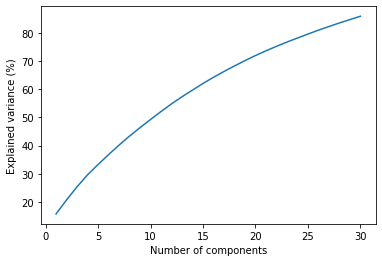

In [420]:
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


In [421]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.00607954 0.02715441 0.02730269 ... 0.01587964 0.00931366 0.00917527]
 [0.00753552 0.01527297 0.08148167 ... 0.05731834 0.06690979 0.06504738]
 [0.00528274 0.0160741  0.04335687 ... 0.01246433 0.05315561 0.05549688]
 ...
 [0.0038654  0.00135027 0.11119047 ... 0.00766716 0.20523162 0.20626825]
 [0.01102708 0.00319173 0.21374876 ... 0.00749344 0.12797834 0.12944583]
 [0.02046964 0.00871302 0.25877201 ... 0.02918877 0.18731068 0.19002385]]


In [422]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {usefulcoldata.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['sub_cs_0.0', 'sub_ip_0.0', 'sub_emb_c_0.0', 'sub_ml_0.0']
Component 1: ['Year_2.0', 'Year_3.0', 'Department_category_0.0', 'preference1_3.0']
Component 2: ['preference1_3.0', 'preference2_3.0', 'preference1_1.0', 'preference4_2.0']
Component 3: ['Department_category_0.0', 'preference1_4.0', 'Year_2.0', 'preference1_1.0']
Component 4: ['preference3_3.0', 'preference1_3.0', 'preference4_5.0', 'preference3_5.0']
Component 5: ['preference2_0.0', 'preference1_1.0', 'preference1_0.0', 'preference4_2.0']
Component 6: ['preference2_1.0', 'preference3_1.0', 'preference2_0.0', 'preference1_0.0']
Component 7: ['Year_3.0', 'Department_category_1.0', 'Department_category_0.0', 'preference3_0.0']
Component 8: ['preference3_0.0', 'preference4_5.0', 'preference2_3.0', 'preference2_0.0']
Component 9: ['preference4_1.0', 'preference3_1.0', 'preference4_2.0', 'preference1_0.0']
Component 10: ['preference4_3.0', 'preference2_3.0', 'preference4

Projecting 130-dimensional data to 2D


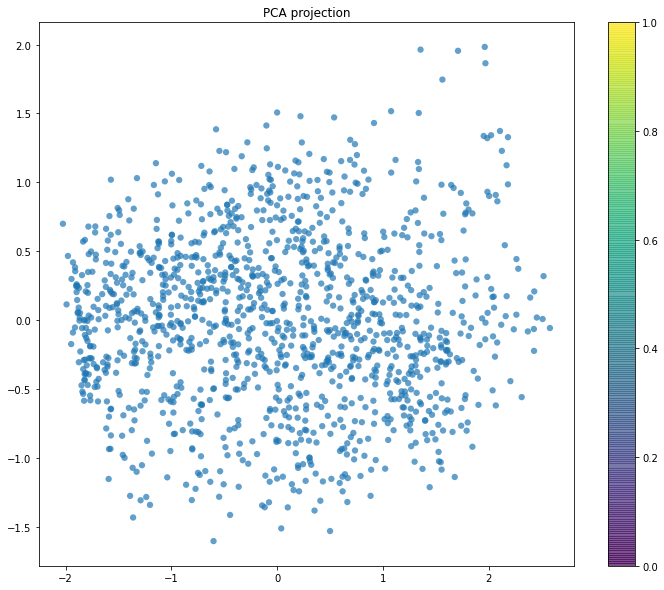

In [409]:
print('Projecting %d-dimensional data to 2D' % data_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

## **K-Means Algorithm**

**K-Means using PCA features**

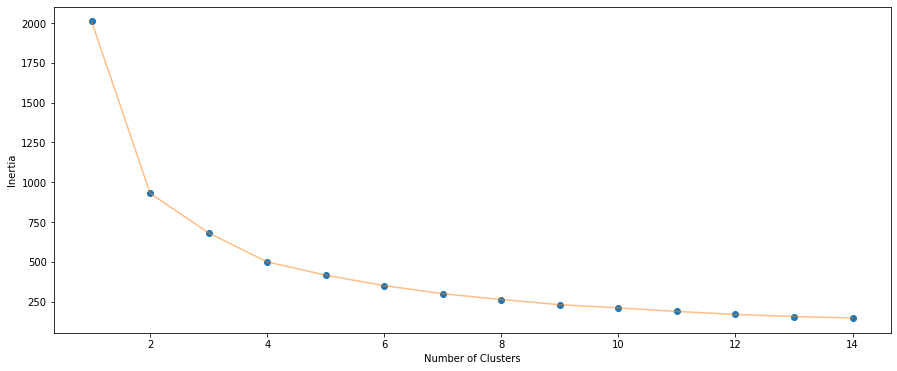

In [410]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [411]:
# kmeans = KMeans(n_clusters=6, random_state=0).fit(principalDf)
# y_kmeans = kmeans.predict(principalDf)
# plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)


algorithm_pca = (KMeans(n_clusters =6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm_pca.fit(principalDf)
labels_pca = algorithm_pca.labels_
centroids_pca = algorithm_pca.cluster_centers_

centroids_pca

array([[ 1.77885864,  0.51841084],
       [-0.69566889,  0.38597386],
       [-1.51145181, -0.15415618],
       [-0.06295097, -0.62925265],
       [ 0.33871944,  0.62907826],
       [ 1.1343792 , -0.38715074]])

In [412]:
h = 0.02
x_min, x_max = principalDf.to_numpy()[:, 0].min() - 1, principalDf.to_numpy()[:, 0].max() + 1
y_min, y_max = principalDf.to_numpy()[:, 1].min() - 1, principalDf.to_numpy()[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm_pca.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'component1' ,y = 'component2' , data = principalDf , c = labels_pca , s = 200 )
plt.scatter(x = centroids_pca[: , 0] , y =  centroids_pca[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('1') , plt.xlabel('0')
plt.show()

In [414]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(principalDf, labels_pca)
silhouette_vals

array([0.26629902, 0.302264  , 0.31758901, ..., 0.45325592, 0.60979555,
       0.1949981 ])

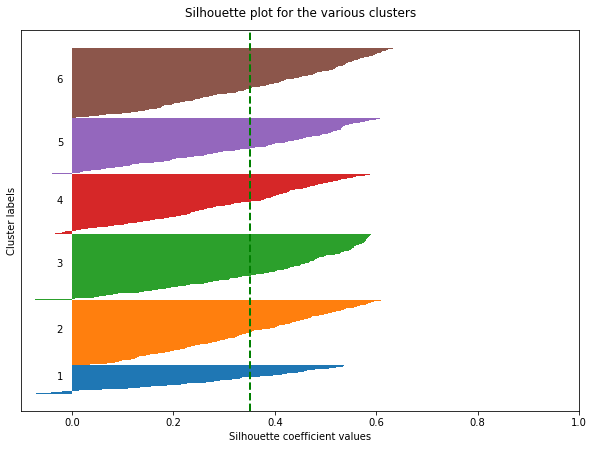

In [416]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_pca.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_pca)):
    cluster_silhouette_vals = silhouette_vals[labels_pca == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

## **K-Means Algorithm**

**K-Means using Direct Dataset**

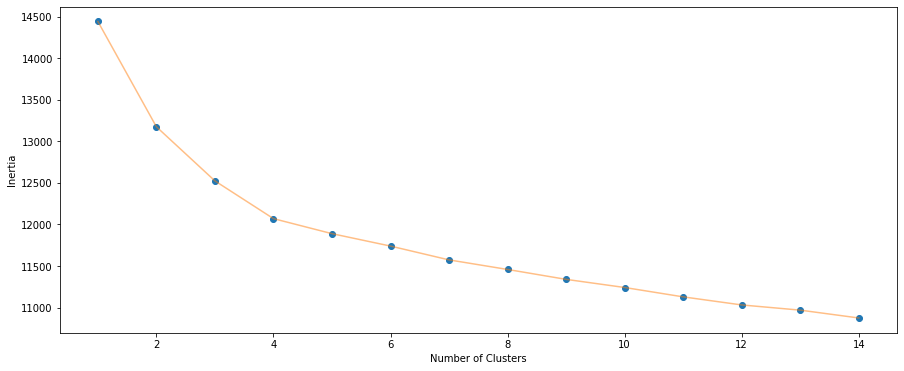

In [205]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
# y_kmeans = kmeans.predict(data_scaled)
# plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

algorithm_data = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm_data.fit(data_scaled)
labels_data = algorithm_data.labels_
centroids_data = algorithm_data.cluster_centers_

centroids_data

In [210]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(data_scaled, labels_data)
silhouette_vals

array([ 0.01202076,  0.00328248, -0.02274365, ...,  0.07364057,
        0.01042701, -0.00186815])

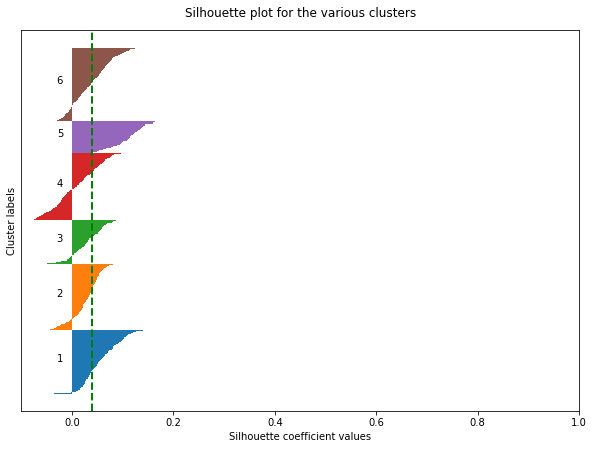

In [211]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_data.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_data)):
    cluster_silhouette_vals = silhouette_vals[labels_data == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);